<a href="https://colab.research.google.com/github/evillabong/ucs-jvillarreal-HF/blob/main/ProyectoFinal_Villarreal_JoseAntonio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Final: Paradigmas de Programación para IA y Análisis de Datos  
### Autor: José Antonio Villarreal Ortiz  
### Dataset: Heart Failure Prediction  

## Selección y Justificación del Dataset

**Dataset seleccionado:**  
[Heart Failure Prediction - Kaggle](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

**Repositorio donde se aloja el archivo CSV:**  
[https://github.com/evillabong/ucs-jvillarreal-HF/blob/main/heart.csv](https://github.com/evillabong/ucs-jvillarreal-HF/blob/main/heart.csv)

**Descripción del problema:**  
El objetivo es predecir si una persona padece o no una enfermedad cardíaca a partir de datos clínicos, aplicando un enfoque completo de análisis y modelado.

**Variable objetivo:** `HeartDisease` (1 = Sí, 0 = No)  
**Tipo de problema:** Clasificación binaria


In [ ]:
import pandas as pd
import requests
from io import StringIO

# URL RAW de GitHub
url = "https://raw.githubusercontent.com/evillabong/ucs-jvillarreal-HF/main/heart.csv"

# Descarga y carga del CSV con validación
response = requests.get(url)
if response.status_code == 200:
    df = pd.read_csv(StringIO(response.text))
    print("✅ Dataset cargado correctamente.")
else:
    print(f"❌ Error al cargar el dataset. Código de estado: {response.status_code}")


✅ Dataset cargado correctamente.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
# Verificar valores nulos
print(df.isnull().sum())

# Asegurar tipos
df.dtypes


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


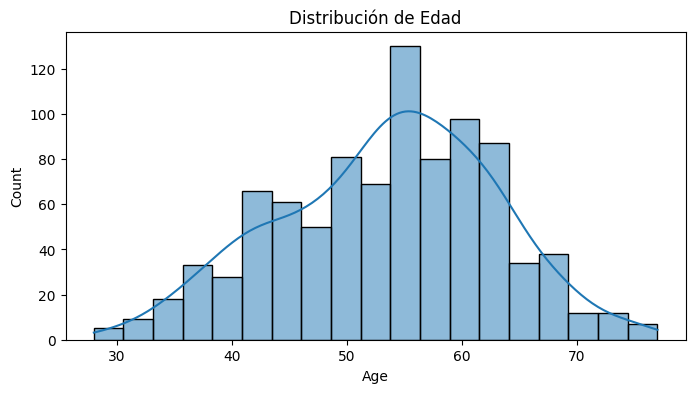

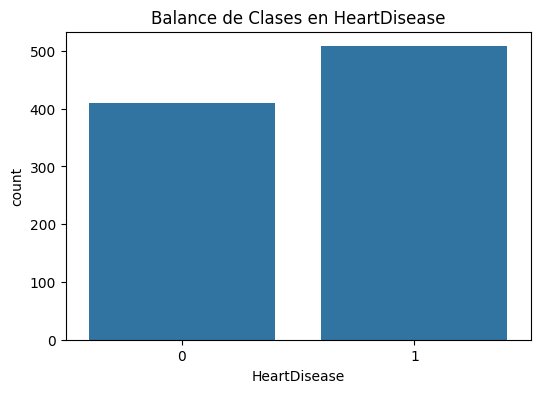

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma de la edad
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], kde=True)
plt.title('Distribución de Edad')
plt.show()

# Balance de clases
plt.figure(figsize=(6, 4))
sns.countplot(x='HeartDisease', data=df)
plt.title('Balance de Clases en HeartDisease')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

class MiPipeline:
    def __init__(self):
        self.model = None
        self.features_list = None

    def preprocesar_datos(self, dataframe, target_col):
        X = dataframe.drop(columns=[target_col])
        y = dataframe[target_col]

        # Codificación de variables categóricas
        X = pd.get_dummies(X, drop_first=True)

        self.features_list = X.columns.tolist()
        return X, y

    def entrenar_modelo(self, X_train, y_train):
        self.model = RandomForestClassifier(random_state=42)
        self.model.fit(X_train, y_train)

    def evaluar_rendimiento(self, X_test, y_test):
        if self.model:
            y_pred = self.model.predict(X_test)
            print("Accuracy:", accuracy_score(y_test, y_pred))
            print(classification_report(y_test, y_pred))


In [ ]:
pipeline = MiPipeline()

In [ ]:
def test_pipeline_entrenamiento():
    """
    Esta prueba simula el flujo completo del pipeline:
    - Preprocesamiento de datos
    - Entrenamiento
    - Evaluación
    """
    import requests
    from io import StringIO

    url = "https://raw.githubusercontent.com/evillabong/ucs-jvillarreal-HF/main/heart.csv"
    response = requests.get(url)
    if response.status_code == 200:
        df = pd.read_csv(StringIO(response.text))
    else:
        raise Exception("Error al cargar dataset")

    X, y = pipeline.preprocesar_datos(df, "HeartDisease")
    assert X.shape[0] == y.shape[0], "X e y deben tener el mismo número de registros"
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    pipeline.entrenar_modelo(X_train, y_train)
    assert pipeline.model is not None, "Modelo no entrenado correctamente"
    print("\n--- Evaluación del Modelo ---")
    pipeline.evaluar_rendimiento(X_test, y_test)

    test_pipeline_entrenamiento()


## Requisitos para Reproducibilidad

1. Crear `requirements.txt` con:
```bash
pip freeze > requirements.txt
```

2. Alternativamente, usar:
```bash
pip install pipreqs
pipreqs .
```

3. Crear un `README.md` con:
- Descripción del proyecto
- Cómo ejecutar el notebook
- Fuente del dataset


Conclusión generada en el repositorio [conclusion.md](https://github.com/evillabong/ucs-jvillarreal-HF/blob/main/conclusion.md)